In [139]:
import pandas as pd
import pylab as pl # linear algebra + plots
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import gc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score as auc
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict, Counter
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from scipy.stats import pearsonr
from scipy.sparse import hstack
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
import string
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [140]:
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
tqdm.pandas(desc='Progress')
from collections import Counter
from textblob import TextBlob
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
#import torch
import os 
import nltk
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [141]:
df=pd.read_csv('trainquora.csv')

In [142]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [143]:
len(df[df['target']==1])

80810

In [144]:
len(df[df['target']==0])

1225312

In [145]:
len(df)

1306122

In [146]:
80810/1225312

0.06595054973753624

In [103]:
#Highly imbalanced dataset

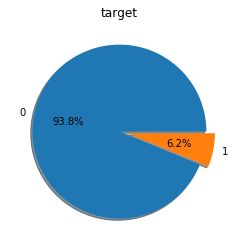

In [104]:
ax=df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%' ,shadow=True)
ax.set_title('target')
ax.set_ylabel('')
plt.show()

In [105]:
##Highly imbaanced dataset

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [107]:
df.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [108]:
#Fortunately nothing is null here

In [109]:
df.describe()

,target
count,1.306122e+06
mean,6.187018e-02
std,2.409197e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [110]:
df.describe(include=["O"])

,qid,question_text
count,1306122,1306122
unique,1306122,1306122
top,1ff2668506bdfa27933e,How do I better study in economics?
freq,1,1


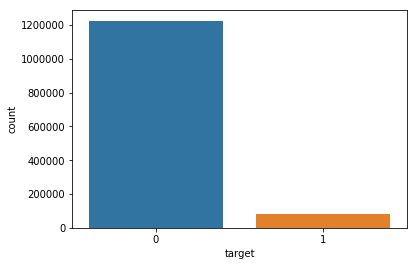

In [111]:
sns.countplot(df['target'])

Text(0.5, 1.0, 'Distribution of question text length in characters')

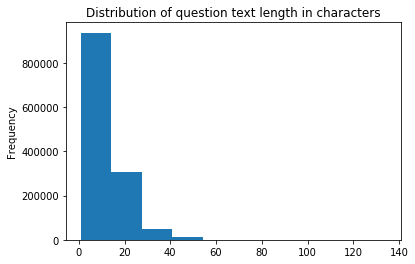

In [112]:
(df['question_text'].apply(lambda x: len(x.split()))).plot(kind='hist');

plt.title('Distribution of question text length in characters')

In [113]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [114]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    


In [115]:
import string

In [116]:
y_true=df['target']

In [117]:
insincere=df[df['target']==1]
sincere=df[df['target']==0]

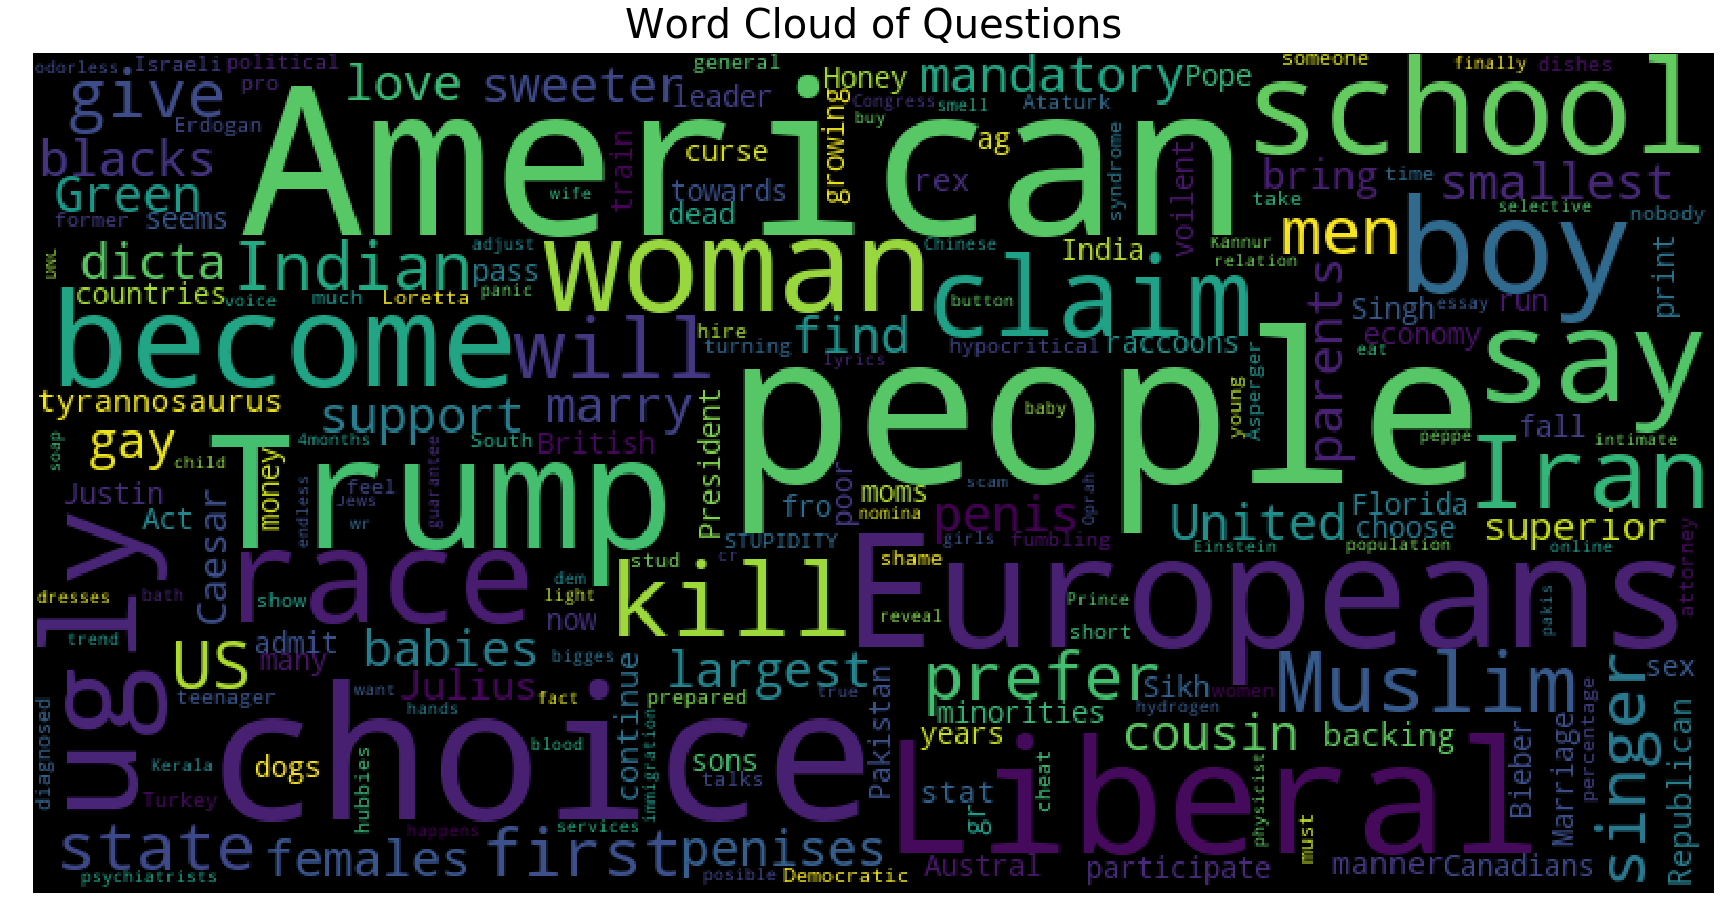

In [118]:
plot_wordcloud(insincere['question_text'], title="Word Cloud of Questions")

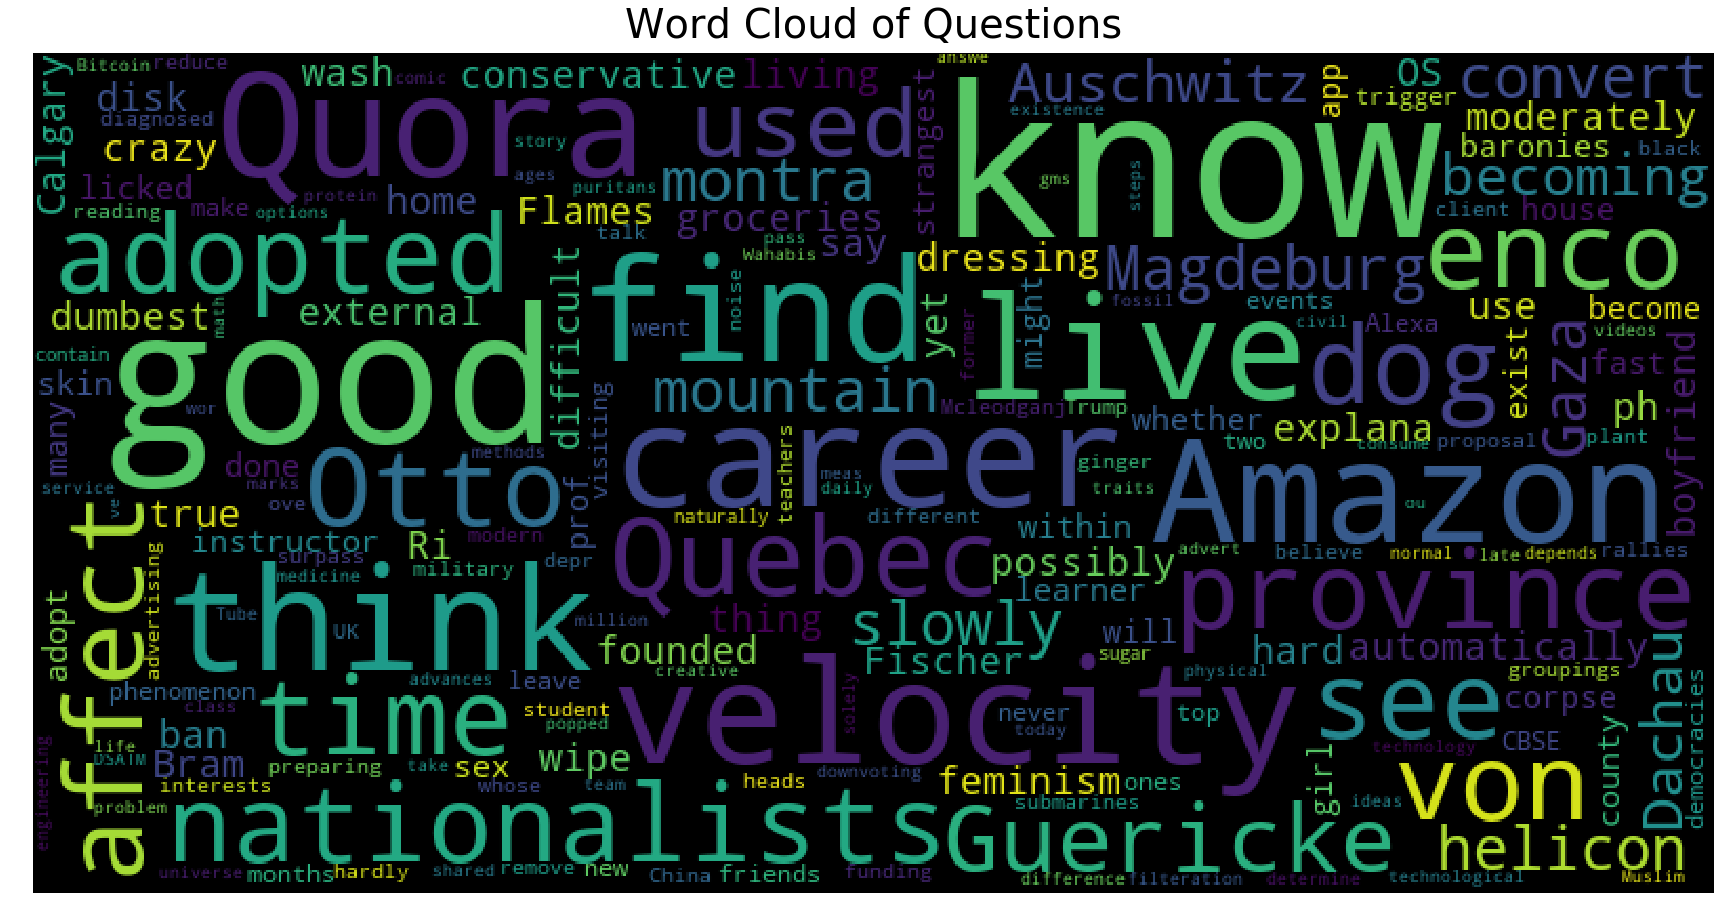

In [119]:
plot_wordcloud(sincere['question_text'], title="Word Cloud of Questions")

In [120]:
##There is a clear difference between both the groups.

In [121]:
#Lets see the most common unigrams,bigrams,trigrams.We can use NLTK or write the fxn as below:

In [122]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

In [123]:
#Import unigrams,bigrams,trigrams
def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    token = [token for token in s.split(" ") if token != "" and token not in stop_words and len(token)>2]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[token[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]


In [124]:
freq_dict = defaultdict(int)
for sent in insincere["question_text"]:
    for word in generate_ngrams(sent,1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]


In [125]:
fd_sorted.iloc[:10,:]

,word,wordcount
0,people,12975
1,trump,6598
2,like,6013
3,women,6009
4,men,4253
5,would,4151
6,think,3893
7,white,3880
8,muslims,3593
9,many,3576


In [126]:
freq_dict = defaultdict(int)
for sent in sincere["question_text"]:
    for word in generate_ngrams(sent,1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]


In [127]:
fd_sorted.iloc[:10,:]

,word,wordcount
0,best,61817
1,get,59531
2,would,57373
3,like,43493
4,people,43485
5,good,37008
6,one,32681
7,india,29519
8,make,26335
9,time,22967


In [128]:
##Bigrams

In [129]:
freq_dict = defaultdict(int)
for sent in insincere["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted.iloc[:10,:]

,word,wordcount
0,donald trump,1448
1,white people,898
2,black people,816
3,year old,775
4,united states,580
5,president trump,479
6,trump supporters,428
7,hillary clinton,402
8,many people,397
9,even though,342


In [130]:
freq_dict = defaultdict(int)
for sent in sincere["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted.iloc[:10,:]

,word,wordcount
0,best way,7023
1,year old,3818
2,would happen,3516
3,united states,3143
4,high school,2750
5,computer science,2672
6,look like,2601
7,feel like,2519
8,would win,2343
9,get rid,2326
